In [1]:
import json
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
filename = 'new_data.json'
with open(filename,mode="r") as f:
    try: 
        data = json.load(f) 
    except:
        data = []

print("data size : %d" % len(data))

voteNums = []
commentNums = []
createTimes = []
titles = []
for issue in data :
    title,createTime,state,number,commentNum,voteNum = issue.values()
    createTimes.append(createTime)
    voteNums.append(voteNum)
    commentNums.append(commentNum)
    titles.append(title)
issues = {'createTime':createTimes,
          'voteNum':voteNums,
          'commentNum':commentNums,
          'title':titles,
          'level':None}

df = pd.DataFrame(issues)

data size : 14049


In [3]:
df['createTime'] = pd.to_datetime(df['createTime']).dt.date

In [4]:
df['createTime'] = (df['createTime'][0] - df['createTime']).astype('timedelta64[D]') 

In [5]:
df.head()

,createTime,voteNum,commentNum,title,level
0,0.0,2,1,Choose number of shown hierarchy levels in Fil...,None
1,1.0,4,10,Ability to switch to previous behavior on 1.52...,None
2,2.0,0,1,Snippet extendibility,None
3,2.0,1,10,Ability to specify settings on per path basis,None
4,2.0,0,1,Terminal window,None


In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

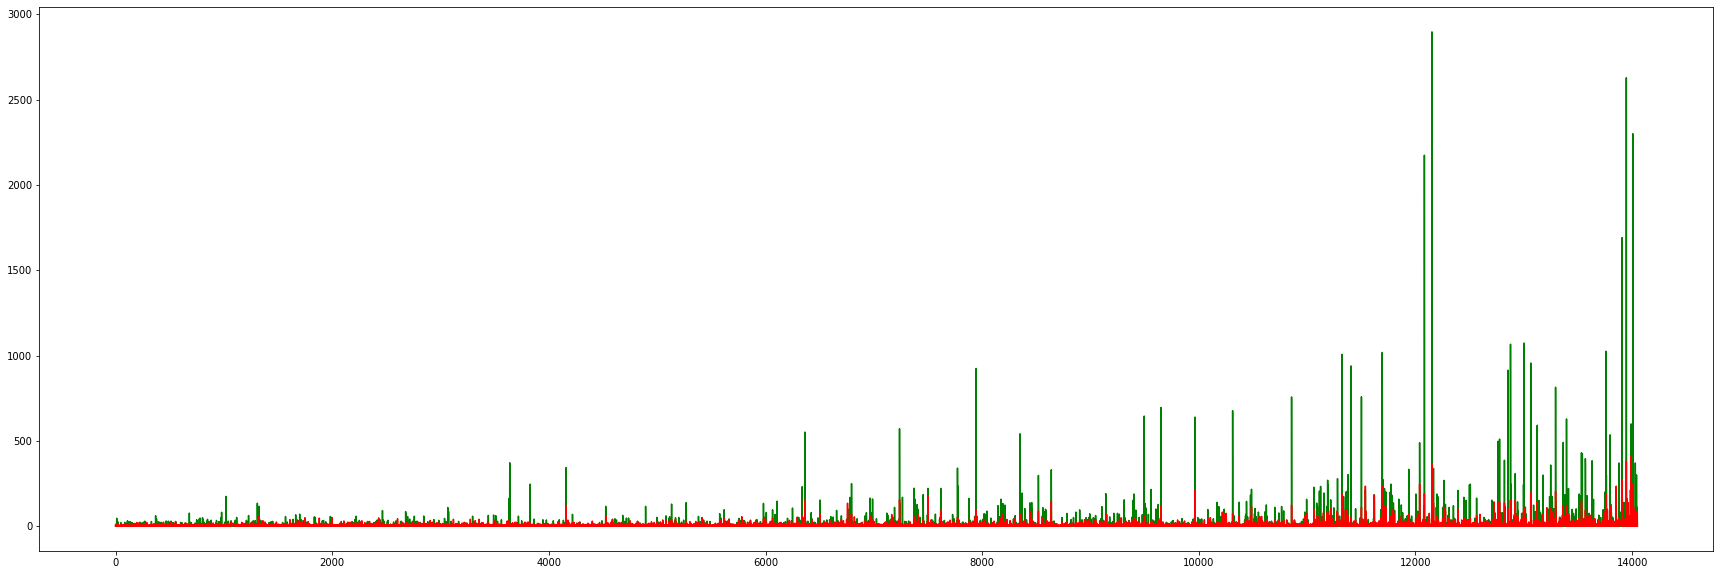

In [7]:
plt.figure(figsize=(30,10))
df['voteNum'].plot(color='g')
df['commentNum'].plot(color='r')

In [8]:
abs(df[['createTime','voteNum','commentNum']].corr()['createTime']).sort_values(ascending=False)

createTime    1.000000
commentNum    0.146526
voteNum       0.094714
Name: createTime, dtype: float64

In [9]:
df.head(5).append(df.tail(5))

,createTime,voteNum,commentNum,title,level
0,0.0,2,1,Choose number of shown hierarchy levels in Fil...,None
1,1.0,4,10,Ability to switch to previous behavior on 1.52...,None
2,2.0,0,1,Snippet extendibility,None
3,2.0,1,10,Ability to specify settings on per path basis,None
4,2.0,0,1,Terminal window,None
14044,1852.0,1,12,Provide API to open a new folder,None
14045,1852.0,0,0,Git integration doesn't work if the open folde...,None
14046,1852.0,0,3,It should be possible to include paths in sear...,None
14047,1852.0,110,66,"Running Code should open a new instance, not a...",None
14048,1852.0,0,2,Update vscode extensions to package.json schema,None


In [10]:
from scipy.stats import pearsonr
pearsonr(df['voteNum'],df['commentNum'])

(0.7452264475098408, 0.0)

In [11]:
df.describe()

,createTime,voteNum,commentNum
count,14049.000000,14049.000000,14049.000000
mean,975.391843,8.230977,6.315254
std,524.707649,60.726987,13.539165
min,0.000000,0.000000,0.000000
25%,524.000000,0.000000,2.000000
50%,1019.000000,0.000000,3.000000
75%,1405.000000,2.000000,6.000000
max,1852.000000,2897.000000,411.000000


In [12]:
df1 = df[df['createTime']<=463]
df2 = df[(df['createTime']>463) & (df['createTime']<=463*2)]
df3 = df[(df['createTime']>463*2) & (df['createTime']<=463*3)]
df4 = df[df['createTime']>463*3]

### 处理df4

In [13]:
Counter(df4['voteNum'].sort_values(ascending=True))

Counter({0: 1975,
         1: 343,
         2: 206,
         3: 141,
         4: 104,
         5: 88,
         6: 47,
         7: 58,
         8: 44,
         9: 45,
         10: 24,
         11: 20,
         12: 16,
         13: 25,
         14: 24,
         15: 18,
         16: 21,
         17: 18,
         18: 14,
         19: 16,
         20: 7,
         21: 10,
         22: 11,
         23: 11,
         24: 7,
         25: 8,
         26: 8,
         27: 12,
         28: 8,
         29: 7,
         30: 7,
         31: 5,
         32: 5,
         33: 3,
         34: 5,
         35: 6,
         36: 7,
         37: 5,
         38: 7,
         39: 2,
         40: 4,
         41: 3,
         42: 8,
         43: 4,
         44: 3,
         45: 4,
         46: 3,
         47: 1,
         48: 2,
         49: 5,
         50: 2,
         51: 2,
         54: 5,
         55: 5,
         56: 3,
         57: 1,
         58: 2,
         59: 3,
         60: 3,
         61: 2,
         62: 4,
    

In [14]:
index = df4[df4['voteNum']<=5].index

In [15]:
df4.drop(index).describe()

,createTime,voteNum,commentNum
count,791.000000,791.000000,791.000000
mean,1625.748420,81.619469,28.410872
std,140.520961,227.832340,43.032685
min,1390.000000,6.000000,0.000000
25%,1507.500000,10.000000,6.000000
50%,1611.000000,20.000000,14.000000
75%,1752.500000,60.000000,32.000000
max,1852.000000,2897.000000,411.000000


In [16]:
df4['level'][df4['voteNum']<=5] = 'Lowest'
df4['level'][df4['voteNum']>=6] = 'Low'
df4['level'][df4['voteNum']>=10] = 'Medium'
df4['level'][df4['voteNum']>=20] = 'High'
df4['level'][df4['voteNum']>=60] = 'Highest'

### 处理df3

In [17]:
Counter(df3['voteNum'].sort_values(ascending=True))

Counter({0: 2264,
         1: 519,
         2: 287,
         3: 179,
         4: 138,
         5: 89,
         6: 63,
         7: 53,
         8: 43,
         9: 43,
         10: 36,
         11: 24,
         12: 30,
         13: 22,
         14: 10,
         15: 16,
         16: 15,
         17: 14,
         18: 18,
         19: 8,
         20: 12,
         21: 10,
         22: 17,
         23: 9,
         24: 6,
         25: 9,
         26: 5,
         27: 4,
         28: 7,
         29: 4,
         30: 9,
         31: 8,
         32: 3,
         33: 6,
         34: 5,
         35: 4,
         36: 5,
         37: 6,
         38: 2,
         39: 1,
         40: 5,
         41: 5,
         42: 3,
         43: 7,
         44: 2,
         45: 2,
         46: 4,
         47: 2,
         48: 5,
         49: 3,
         50: 6,
         51: 6,
         52: 1,
         53: 2,
         54: 1,
         55: 3,
         56: 2,
         57: 4,
         59: 3,
         60: 5,
         61: 3,
      

In [18]:
index = df3[df3['voteNum']<=4].index
df3.drop(index).describe()

,createTime,voteNum,commentNum
count,779.000000,779.000000,779.000000
mean,1176.572529,35.229782,13.854942
std,137.704896,76.530736,19.283456
min,927.000000,5.000000,0.000000
25%,1041.000000,7.000000,4.000000
50%,1189.000000,13.000000,8.000000
75%,1298.000000,31.500000,16.000000
max,1389.000000,924.000000,213.000000


In [19]:
df3['level'][df3['voteNum']<=4] = 'Lowest'
df3['level'][df3['voteNum']>=5] = 'Low'
df3['level'][df3['voteNum']>=7] = 'Medium'
df3['level'][df3['voteNum']>=13] = 'High'
df3['level'][df3['voteNum']>=31] = 'Highest'

### 处理df2

In [20]:
Counter(df2['voteNum'].sort_values(ascending=True))

Counter({0: 1837,
         1: 428,
         2: 210,
         3: 135,
         4: 84,
         5: 61,
         6: 37,
         7: 24,
         8: 30,
         9: 22,
         10: 21,
         11: 17,
         12: 7,
         13: 11,
         14: 9,
         15: 10,
         16: 7,
         17: 7,
         18: 6,
         19: 3,
         20: 4,
         21: 8,
         22: 3,
         23: 4,
         24: 4,
         25: 3,
         26: 3,
         27: 4,
         28: 3,
         29: 3,
         30: 2,
         31: 4,
         32: 1,
         33: 2,
         34: 2,
         35: 4,
         36: 4,
         37: 3,
         38: 2,
         41: 1,
         42: 1,
         43: 1,
         45: 2,
         46: 2,
         47: 3,
         49: 2,
         51: 3,
         55: 1,
         57: 1,
         58: 2,
         60: 1,
         61: 1,
         63: 2,
         65: 1,
         68: 1,
         69: 1,
         71: 1,
         73: 1,
         80: 1,
         96: 2,
         116: 2,
         129: 

In [21]:
index = df2[df2['voteNum']<=3].index
df2.drop(index).describe()

,createTime,voteNum,commentNum
count,460.000000,460.000000,460.000000
mean,722.804348,17.856522,9.278261
std,130.509262,32.508572,10.763691
min,464.000000,4.000000,0.000000
25%,620.000000,5.000000,3.000000
50%,734.500000,8.000000,6.000000
75%,837.750000,17.000000,11.000000
max,926.000000,371.000000,121.000000


In [22]:
df2['level'][df2['voteNum']<=3] = 'Lowest'
df2['level'][df2['voteNum']>=4] = 'Low'
df2['level'][df2['voteNum']>=5] = 'Medium'
df2['level'][df2['voteNum']>=8] = 'High'
df2['level'][df2['voteNum']>=17] = 'Highest'

### 处理df1

In [23]:
Counter(df1['voteNum'].sort_values(ascending=True))

Counter({0: 1749,
         1: 485,
         2: 252,
         3: 145,
         4: 92,
         5: 64,
         6: 40,
         7: 33,
         8: 34,
         9: 20,
         10: 15,
         11: 11,
         12: 17,
         13: 14,
         14: 5,
         15: 3,
         16: 9,
         17: 4,
         18: 6,
         19: 6,
         20: 9,
         21: 12,
         22: 10,
         23: 17,
         24: 6,
         25: 12,
         26: 9,
         27: 5,
         28: 6,
         29: 10,
         30: 2,
         31: 7,
         32: 2,
         33: 3,
         34: 4,
         35: 2,
         36: 3,
         37: 2,
         38: 3,
         39: 1,
         40: 3,
         41: 1,
         42: 2,
         45: 1,
         46: 1,
         47: 1,
         49: 1,
         50: 2,
         51: 2,
         54: 1,
         56: 2,
         57: 1,
         58: 2,
         59: 1,
         61: 1,
         62: 1,
         66: 1,
         70: 1,
         72: 1,
         76: 1,
         81: 1,
         8

In [24]:
index = df2[df2['voteNum']<=4].index
df2.drop(index).describe()

,createTime,voteNum,commentNum
count,376.000000,376.000000,376.000000
mean,727.837766,20.952128,10.156915
std,129.276480,35.226624,11.449337
min,464.000000,5.000000,0.000000
25%,635.000000,6.000000,4.000000
50%,735.500000,10.000000,6.000000
75%,846.250000,21.000000,12.250000
max,926.000000,371.000000,121.000000


In [25]:
df1['level'][df1['voteNum']<=4] = 'Lowest'
df1['level'][df1['voteNum']>=5] = 'Low'
df1['level'][df1['voteNum']>=6] = 'Medium'
df1['level'][df1['voteNum']>=10] = 'High'
df1['level'][df1['voteNum']>=21] = 'Highest'

### 综合四个区间的分类等级结果

In [26]:
requestLevel = []
requestLevel += df1['level'].values.tolist()
requestLevel += df2['level'].values.tolist()
requestLevel += df3['level'].values.tolist()
requestLevel += df4['level'].values.tolist()

In [27]:
df['level'] = requestLevel

In [28]:
Counter(df['level'])

Counter({'Lowest': 11577,
         'Medium': 674,
         'Highest': 675,
         'Low': 494,
         'High': 629})

In [29]:
df

,createTime,voteNum,commentNum,title,level
0,0.0,2,1,Choose number of shown hierarchy levels in Fil...,Lowest
1,1.0,4,10,Ability to switch to previous behavior on 1.52...,Lowest
2,2.0,0,1,Snippet extendibility,Lowest
3,2.0,1,10,Ability to specify settings on per path basis,Lowest
4,2.0,0,1,Terminal window,Lowest
...,...,...,...,...,...
14044,1852.0,1,12,Provide API to open a new folder,Lowest
14045,1852.0,0,0,Git integration doesn't work if the open folde...,Lowest
14046,1852.0,0,3,It should be possible to include paths in sear...,Lowest
14047,1852.0,110,66,"Running Code should open a new instance, not a...",Highest


In [30]:
df.drop(['commentNum','createTime','voteNum'],axis=1,inplace=True)
df.to_csv('./dataWithLevel.csv',index=False,columns=['title','level'])